In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

### To remove the warning output from the conversion of the image data from float64 to uint8:
(calculation is slower with uint16, so uint8 is enough for this example)

In [2]:
import warnings
warnings.filterwarnings('ignore')

### Using the scikit-image library to deal with the image and do some filtering

In [3]:
from skimage.io import imread
from skimage.filters.rank import entropy
from skimage.morphology import disk
from skimage.util import img_as_ubyte
from skimage.filters import sobel

In [4]:
pic_js = img_as_ubyte(imread('pics/js_pic.jpeg',as_grey=True))
pic_zio = img_as_ubyte(imread('pics/zio_pic.jpeg',as_grey=True))

The entropy of the image is calculated using the base 2  log from the entropy function. The disk function passed as input determines the neighborhood used (here a disk with a radius of 11 pixels). The highest the entropy ==> the more bites necessary to encode the image at the neighborhood.

$$H(p)= \sum_{x}{p(x)log_2{\frac{1}{p(x)}}}$$

For the edge detection, the image is convoluted with a 3 x 3 kernel called a Sobel operator, calculated for both image gradient direction (horizontal and vertical). The resulting amplitude displayed on the image is the norm of the directional components: 
$$Sobel = \sqrt{S_H^2 + S_V^{2}}$$

In [5]:
js_entropy = entropy(pic_js,disk(11))
zio_edges = sobel(pic_zio)

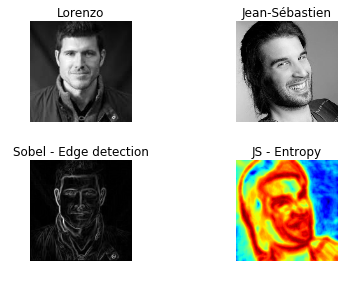

In [6]:
fig,((ax1,ax2),(ax3,ax4)) = plt.subplots(ncols=2,nrows=2)
ax1.imshow(pic_zio,cmap='gray')
ax1.axis('off')
ax1.set_title('Lorenzo')

ax2.imshow(pic_js,cmap='gray')
ax2.axis('off')
ax2.set_title(u'Jean-Sébastien')

ax3.imshow(zio_edges,cmap='gray')
ax3.axis('off')
ax3.set_title('Sobel - Edge detection')

ax4.imshow(js_entropy)
ax4.axis('off')
ax4.set_title('JS - Entropy')

fig.tight_layout()